In [186]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from joblib import dump


In [187]:
df = pd.read_csv('ReadyForModelling.csv')
df.head()

,age,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,occupation_Tech-support,occupation_Transport-moving,gender_Female,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,native-country_United-States
0,-12.822700,4.508438,0.070370,-0.156916,-0.382043,0.078670,-0.207002,0.224506,1.287574,-0.011095,...,-0.006289,-0.003875,-0.003567,0.000683,-4.844109e-07,-1.451707e-14,1.340793e-15,-7.037986e-15,1.273510e-15,7.198423e-15
1,3.078562,8.540342,0.038985,-0.349377,-0.433404,0.700380,0.034102,-0.077076,-0.161077,-0.007278,...,-0.018209,-0.015428,-0.008638,-0.005982,-8.987715e-04,-4.920465e-15,3.484388e-15,-3.814631e-15,1.797914e-15,6.051708e-15
2,-10.056517,3.322130,0.062691,-0.125112,-0.512122,-0.555115,0.776575,0.258759,-0.110912,-0.053063,...,-0.012482,-0.002047,-0.002188,-0.001184,-6.231558e-04,3.528595e-15,3.017237e-15,3.772342e-16,2.437267e-15,1.253744e-15
3,4.625785,-3.017965,0.752775,0.434997,-0.229970,-0.137824,-0.780459,0.833396,1.096368,0.037038,...,-0.002128,-0.008503,-0.003557,-0.000126,7.710590e-06,1.024408e-14,-5.262821e-15,-3.610424e-15,1.084270e-15,-5.913617e-17
4,-8.522139,-8.239705,0.076539,-0.120378,-0.557948,-0.047440,-0.242723,-0.160335,0.052702,-0.111194,...,0.005291,-0.011109,-0.004143,0.000437,-1.641047e-04,1.783455e-13,3.370203e-15,-1.201485e-15,-1.194284e-15,-2.250337e-15


In [188]:
data = pd.read_csv('ReadyForModelling_OG.csv')
# data.drop("workclass", axis=1, inplace=True)
data.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,-0.146811,-0.218899,40,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,-0.146811,-0.218899,50,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,-0.146811,-0.218899,40,>50K,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,0.876868,-0.218899,40,>50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,34,198693,6,-0.146811,-0.218899,30,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [189]:
columns = df.columns

# Print all columns
for column in columns:
    print(column)
    


age
capital-gain
capital-loss
hours-per-week
workclass_Federal-gov
workclass_Local-gov
workclass_Private
workclass_Self-emp-inc
workclass_Self-emp-not-inc
workclass_State-gov
workclass_Without-pay
education_10th
education_11th
education_12th
education_1st-4th
education_5th-6th
education_7th-8th
education_9th
education_Assoc-acdm
education_Assoc-voc
education_Bachelors
education_Doctorate
education_HS-grad
education_Masters
education_Preschool
education_Prof-school
education_Some-college
occupation_Adm-clerical
occupation_Armed-Forces
occupation_Craft-repair
occupation_Exec-managerial
occupation_Farming-fishing
occupation_Handlers-cleaners
occupation_Machine-op-inspct
occupation_Other-service
occupation_Priv-house-serv
occupation_Prof-specialty
occupation_Protective-serv
occupation_Sales
occupation_Tech-support
occupation_Transport-moving
gender_Female
race_Amer-Indian-Eskimo
race_Asian-Pac-Islander
race_Black
race_Other
race_White
gender_Male
native-country_United-States


In [190]:
df['income'] = data['income']
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

X = df.drop(columns=['income'])
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [191]:
model = LogisticRegression(max_iter=100000000000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=100000000000)

In [192]:
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')


Accuracy: 0.8242390702822358


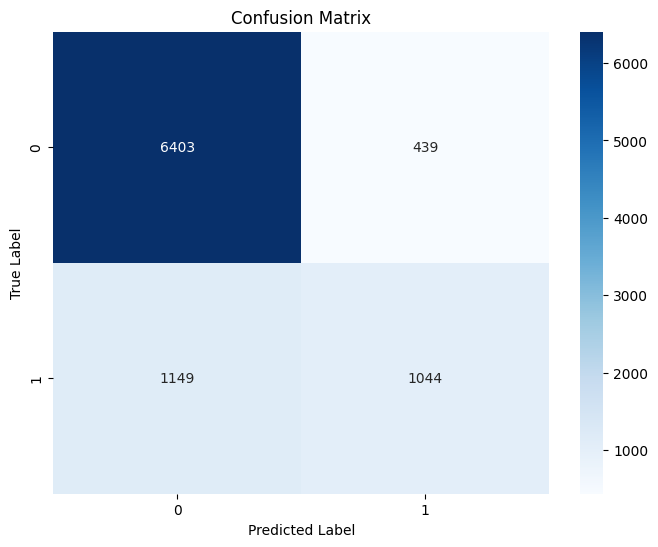

In [193]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

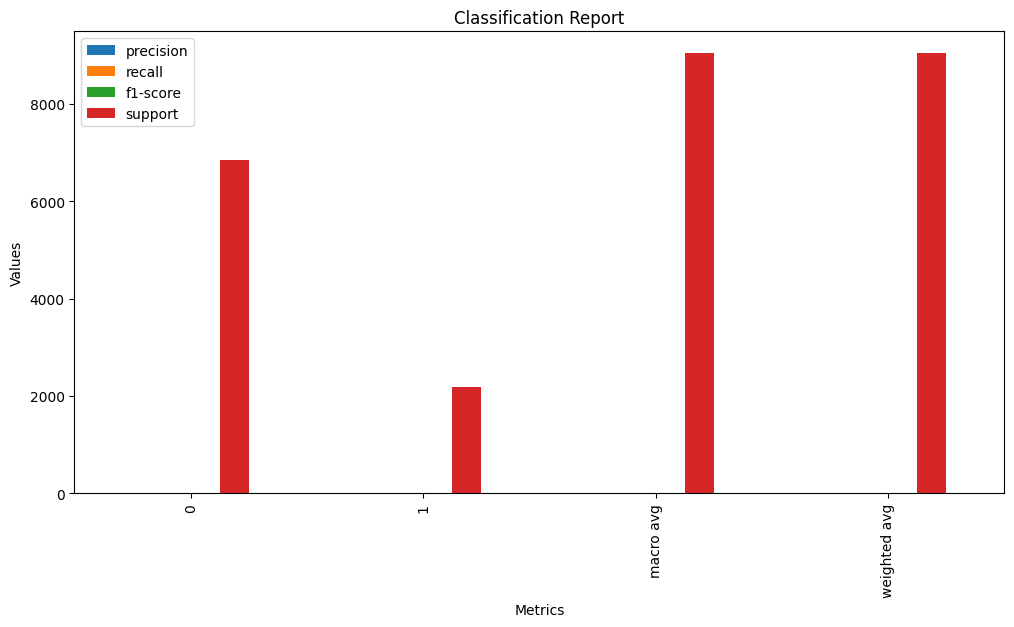

In [194]:
# Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plotting the Classification Report
report_df.drop(['accuracy'], inplace=True)  # Remove the 'accuracy' row for plotting
report_df.plot(kind='bar', figsize=(12, 6))
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()

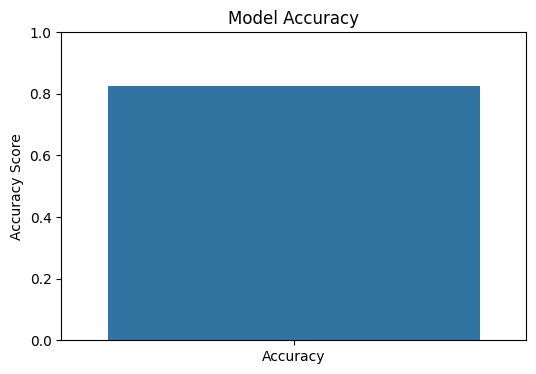

In [195]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Plot accuracy
plt.figure(figsize=(6, 4))
sns.barplot(x=['Accuracy'], y=[accuracy])
plt.title('Model Accuracy')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # Set the limit from 0 to 1 as accuracy ranges between these values
plt.show()

In [196]:
dump(model, 'Model.joblib')


['Model.joblib']